# ML@AIMAS 2024 - Day 1 - Analiza exploratorie a datelor (EDA)
Mihai Trăscău, Florin Dumitrescu

Scopul acestui notebook este de a descrie câteva din tehnicile de explorare a un set de date. Metodele de analiză folosite vă ajută spre a descoperi particularități și probleme ale setului de date, cum ar fi:
* Înțelegerea compoziției setului de date (atribute, valori și exemple)
* Realizarea unor statistici (simple) la nivelul setului de date
* Descoperirea și tratarea datelor eronate sau lipsă
* Vizualizarea datelor (pentru o mai bună înțelegere)
* Calculul corelațiilor între atribute

Toate acestea contribuie la validarea faptului că lucrați cu set de date _„utilizabil”_ și la luarea unei decizii cât mai informate referitoare la modelele de învățare pe care le veți utiliza.

## Bibliotecile Numpy și Pandas
Cele mai populare biblioteci (oferite sub formă de pachete) din Python pentru a realiza astfel de analize sunt [Numpy](https://numpy.org/doc/stable/) și [Pandas](https://pandas.pydata.org/docs/reference/index.html). Numpy servește ca model de bază pentru matricele multidimensionale cu care veți lucra, în timp ce Pandas pune la dispoziție o suită întreagă de metode de analiză și vizualizare a datelor. Majoritatea funcțiilor pe care le veți utiliza în acest laborator sunt din biblioteca _pandas_. Suplimentar, veți folosi și funcții de vizualizare (mai avansate) din biblioteca Matplotlib sau din [Seaborn](https://seaborn.pydata.org/tutorial/introduction) (strâns legată de _Pandas_ ).

## Setul de date
Vom utiliza setul de date [Heart Disease](https://archive.ics.uci.edu/ml/datasets/heart+disease) din colecția UCI. Acesta conține informații despre pacienți care suferă (sau nu) de boli de inimă. Atributele din setul de date sunt, în ordine:
1. _age_ - vârstă
2. _sex_ - sexul biologic al pacientului (1 pentru bărbat și 0 pentru femeie)
3. _cp_  - tipul durerii în piept
4. _trestbps_ - tensiunea arterială la repaos (în mm/Hg)
5. _chol_ - colesterol seric (în mg/dl)
6. _fbs_ - glicemie peste 120 md/dl
7. _restecg_ - rezultate electrocardiograma
8. _thalach_ - puls maxim
9. _exang_ - dureri induse de exerciții (1 pentru da, 0 pentru nu)
10. _oldpeak_ - diferența ECG din testul de stres față de repaos
11. _slope_ - panta ECG în testul de stres
12. _ca_ - numărul de vase majore colorate prin fluoroscopie
13. _thal_ - tip de thalassemie (boală de sânge)
14. _target_ - diagnostic de severitate a îngustării a vaselor de sânge

Atributele se pot împărți în 2 categorii în funcție de semnificația lor și tipul datelor:
* Atribute continue &rarr; pot lua o infinitate de valori numerice dintr-un interval
* Atribute discrete &rarr; pot lua un număr finit de valori (numerice sau categorice)

In [1]:
# Încărcăm pachetele necesare

# Structuri de date și unelte de analiză
import numpy as np
import pandas as pd 

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
# Descărcăm setul de date
data_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
dataset = pd.read_csv(data_link)

---
Afisați primele 5 exemple din setul de date pentru a le inspecta
_(HINT: folosiți variabila **dataset** de mai sus și metode din pandas)_.

In [3]:
dataset.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
Observând problema legată de denumirea coloanelor, rescriem numele acestora pentru a fi ușor de lucrat cu acestea în continuare. Afișăm apoi, din nou, primele 5 exemple.

In [4]:
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


---
Examinăm dimensiunea setului de date (numărul de exemple și atribute) și numărul de valori lipsă (NaN) pentru fiecare
 atribut în parte. Prima dimensiune reprezintă numărul de exemple (`320`), iar a doua numărul de atribute (`14`).

In [5]:
dataset.shape

(302, 14)

---
Găsim, pentru fiecare atribut în parte, următoarele metrici de interes:
* numărul de exemple care nu au valori lipsă
* valoarea medie
* deviația standard a valorilor
* valoarea minimă
* valoarea quantilei 25% (valoarea sub care se găsesc 25% din exemple)
* valoarea quantilei 50% (valoarea sub care se găsesc 50% din exemple)
* valoarea quantilei 75% (valoarea sub care se găsesc 75% din exemple)
* valoarea maximă

_(HINT: Este de ajuns să utilizăm o singură metodă din pandas - describe)_

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


---
Afișăm informații legate de tipul de date și numărul de exemple cu valori nenule pentu fiecare atribut în parte. După
 cum putem observa, avem mai multe tipuri de date: `float64`, `int64` și `object`.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    object 
 12  thal      302 non-null    object 
 13  target    302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


---
Verificăm pentru fiecare atribut în parte câte exemple au valori nule (NaN).

In [8]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

---
Descoperim ce atribute conțin și alte simboluri în afară de valori numerice și afișăm exemplele în cauză prin 
filtrarea acestora într-un singur _DataFrame_ din _pandas_ (care să NU conțină duplicate).

_(HINT: Bazat pe ce am aflat mai sus despre tipurile de date avem deja un indiciu pentru atributele căutate)._

In [9]:
# Pasul 1: Afișăm atributele de tip obiect
categorical_attributes = dataset.select_dtypes(include=['object'])
categorical_attributes.columns

Index(['ca', 'thal'], dtype='object')

In [10]:
# Pasul 2: afișăm numărul de valori unice pentru fiecare atribut de tip obiect
for column in categorical_attributes.columns:
    print(f'{column}: {categorical_attributes[column].nunique()}')

ca: 5
thal: 4


In [11]:
# Pasul 3: Afișăm valorile unice pentru fiecare atribut de tip obiect
for column in categorical_attributes.columns:
    print(f'{column}: {categorical_attributes[column].unique()}')

ca: ['3.0' '2.0' '0.0' '1.0' '?']
thal: ['3.0' '7.0' '6.0' '?']


In [12]:
dataset.loc[dataset['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2


In [13]:
dataset.loc[dataset['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [14]:
dataset.loc[(dataset['ca'] == '?') | (dataset['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


---
Tratarea valorilor lipsă sau necunoscute din setul de date este importantă din perspectiva aplicării ulterioare a metodelor de învățare. Astfel, vom înlocui simbolurile non-numerice descoperite la pasul trecut cu valoarea cea mai frecventă pentru atributul respectiv.

In [15]:
# Salvăm indecșii pentru care avem valori necunoscute. 
# Necesar pentru a afișa exemplele în cauză după înlocuire.
idx = dataset.loc[(dataset['ca'] == '?') | (dataset['thal'] == '?')].index

In [16]:
# Înlocuim valorile necunoscute cu valoarea cea mai frecventă
dataset['thal'] = dataset['thal'].replace('?',dataset['thal'].value_counts().idxmax()).astype('float64')
dataset['ca'] = dataset['ca'].replace('?',dataset['ca'].value_counts().idxmax()).astype('float64')

In [17]:
# Afisăm exemplele în cauză pentru a verifica corectitudinea înlocuirii
dataset.iloc[idx]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,3.0,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,0.0,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,0.0,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,3.0,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,0.0,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


Histogramele reprezintă modalități de vizualiza distribuția (frecvența) de valori ale atributelor din setul de date. Atributele  continue sunt discretizate (în „bins”) înainte de a fi afișate.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

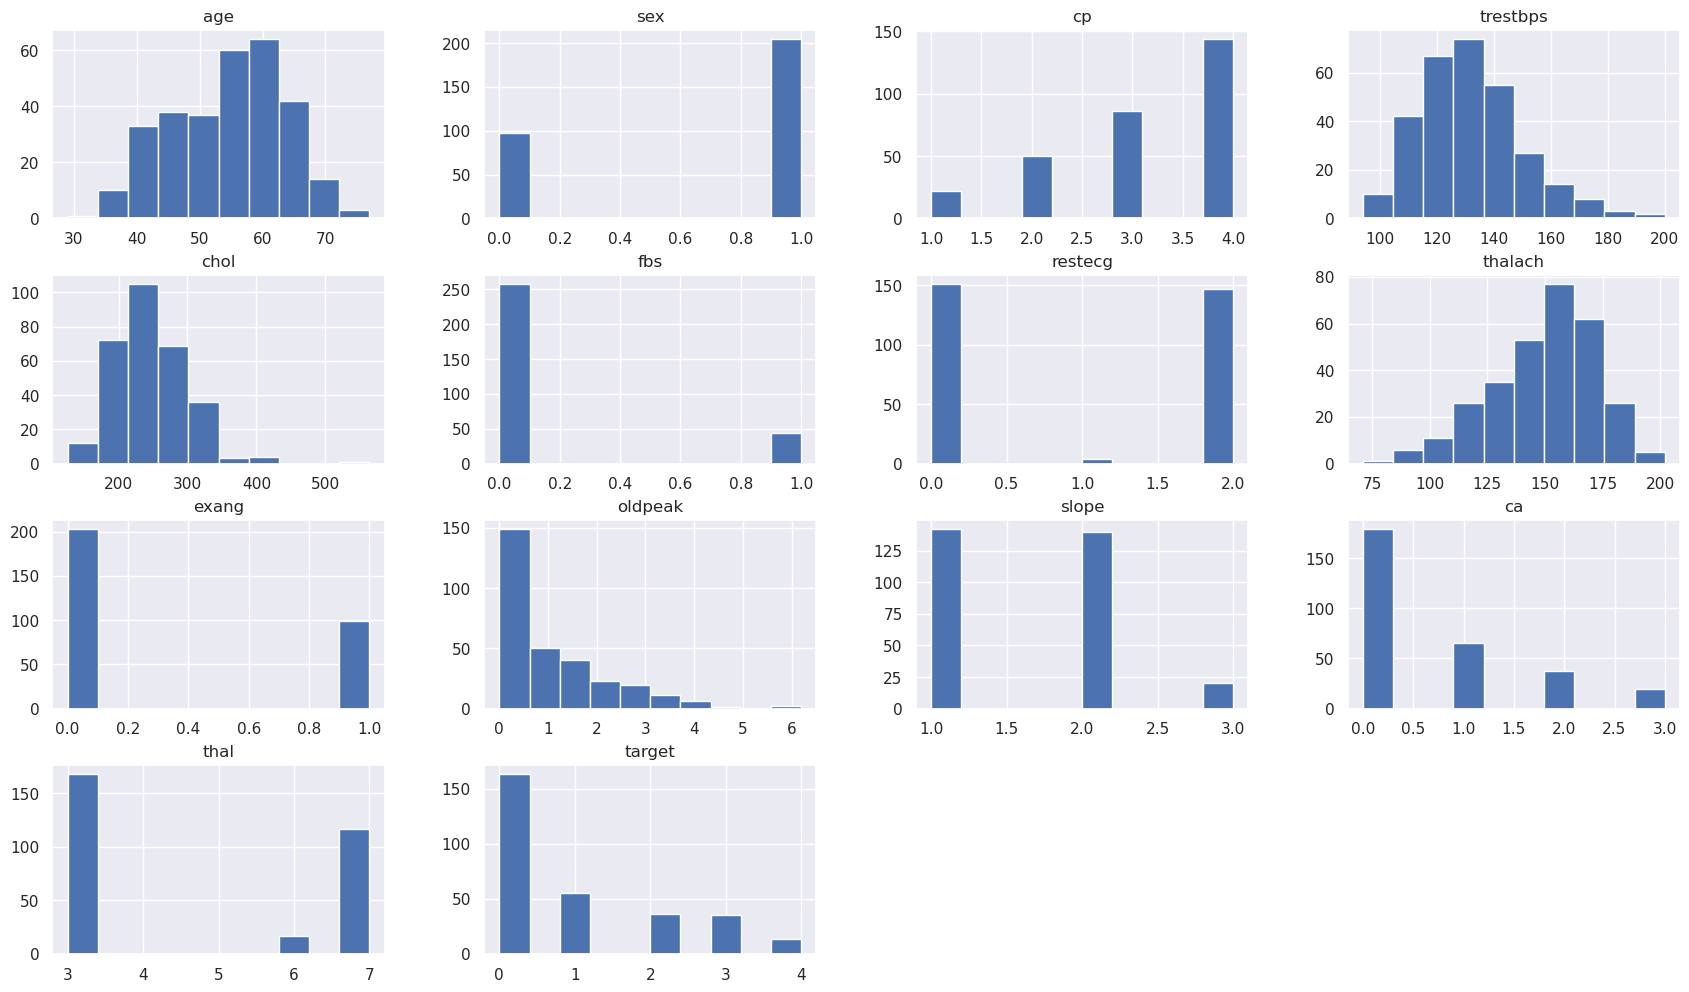

In [18]:
sns.set(rc={'figure.figsize':(21,12)})
dataset.hist()

---
Plotăm histograma atributului _age_ pentru următoarele intervale: 0-18, 18-35, 35-45, 45-55, 55-65 și 65+.

_(HINT: Fixăm și parametrul width pentru histogramă pentru afișare mai plăcută)_

<Axes: >

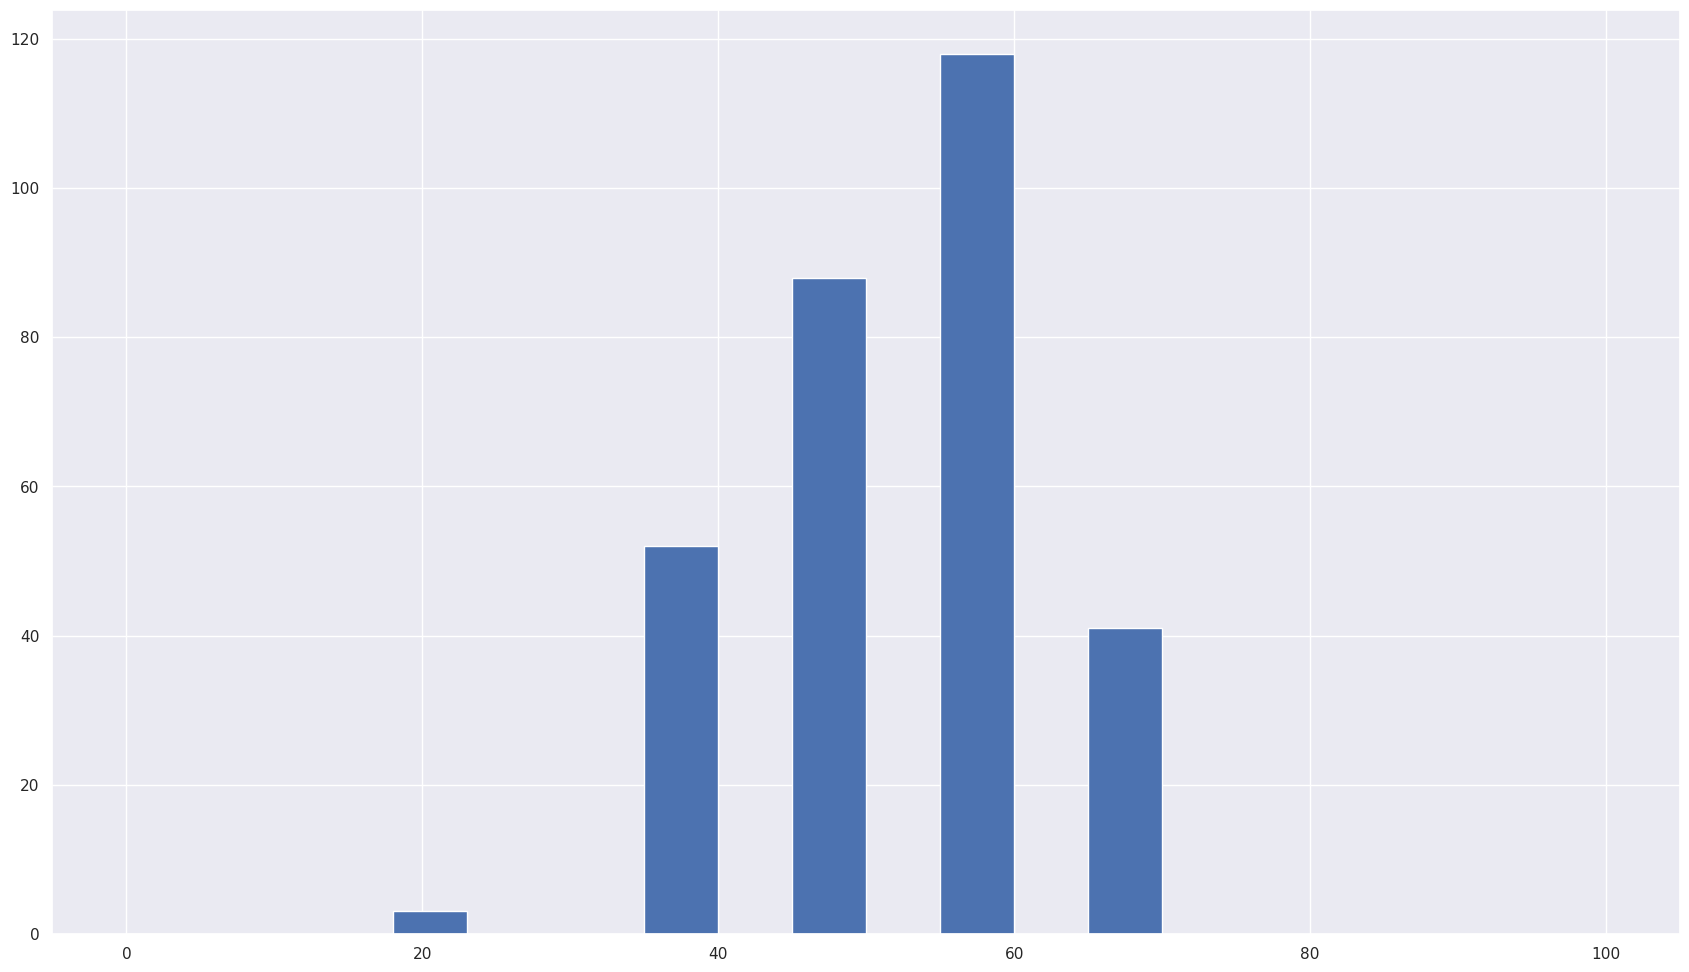

In [19]:
dataset['age'].hist(bins=[0, 18, 35, 45, 55, 65, 100], width=5)

---
Plotăm histograma atributului _target_ grupată după sexul pacienților. Păstrăm aceeași amplitudine pe axa frecvenței pentru graficele obținute.

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

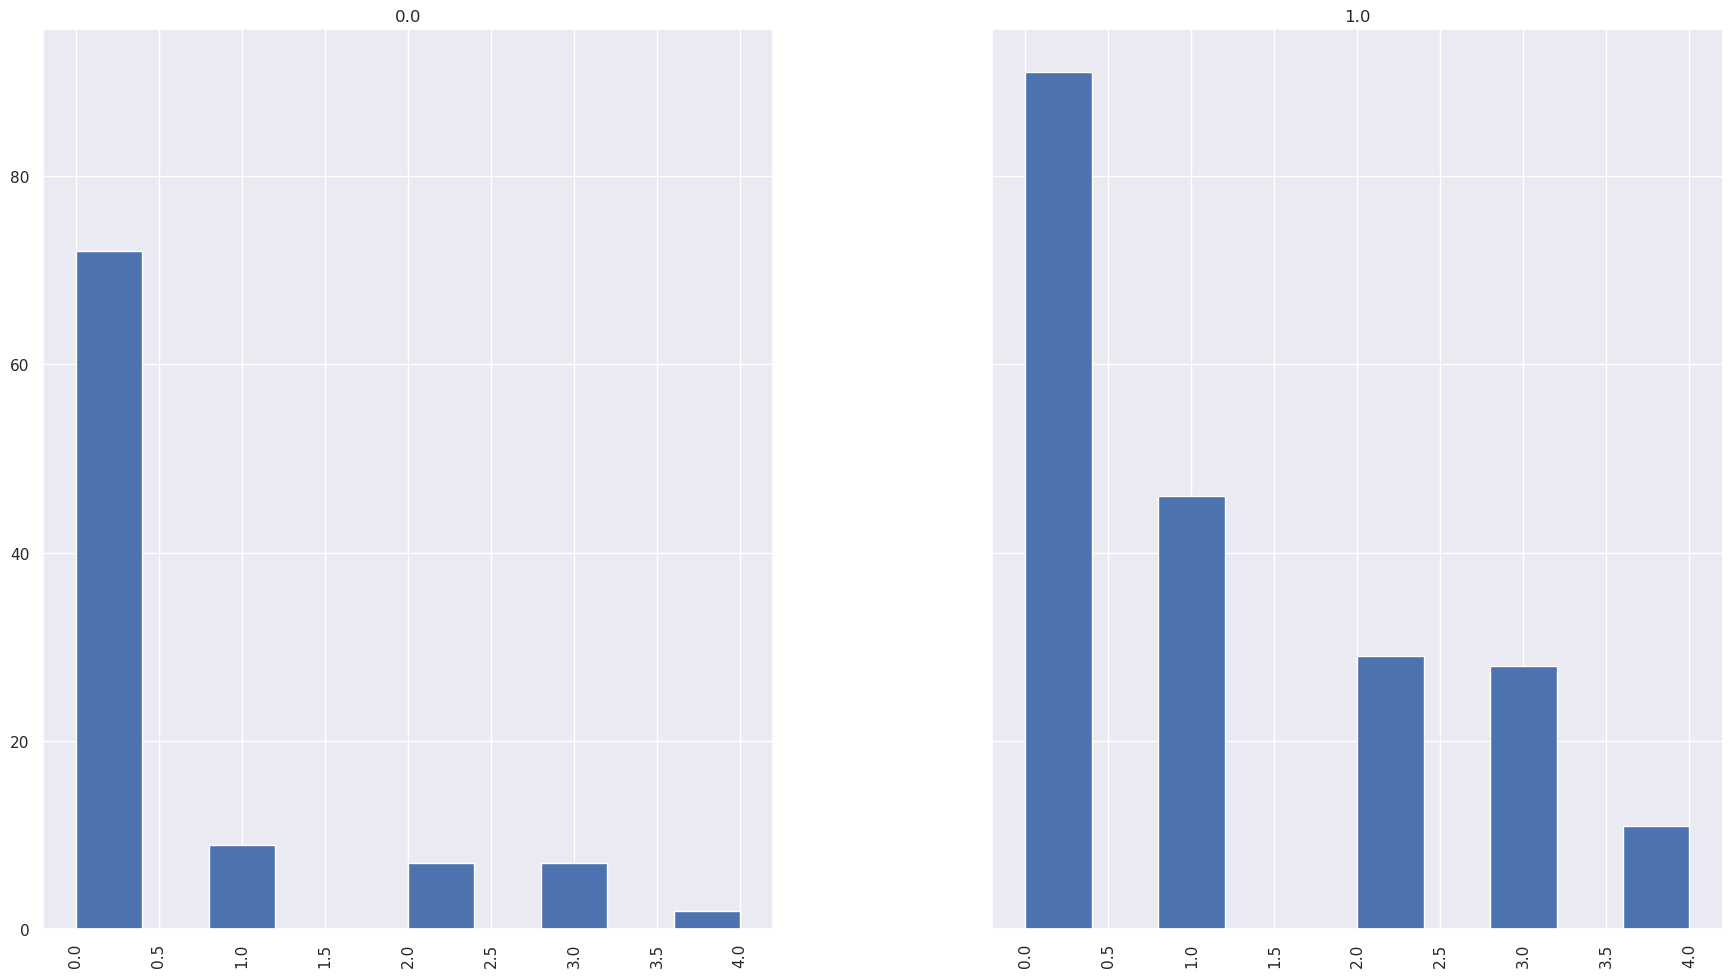

In [20]:
dataset['target'].hist(by=dataset['sex'], sharey=True)

---
Setul nostru de date conține exemple din 5 clase de severitate a diagnosticului, însă pe noi ne interesează doar să cunoaștem dacă diagnosticul este pozitiv sau negativ. Astfel, transformăm atributul _target_ într-unul binar prin remaparea tuturor valorilor non-zero la valoarea _1_. Afișăm apoi histograma pentru atributul astfel modificat.

<Axes: >

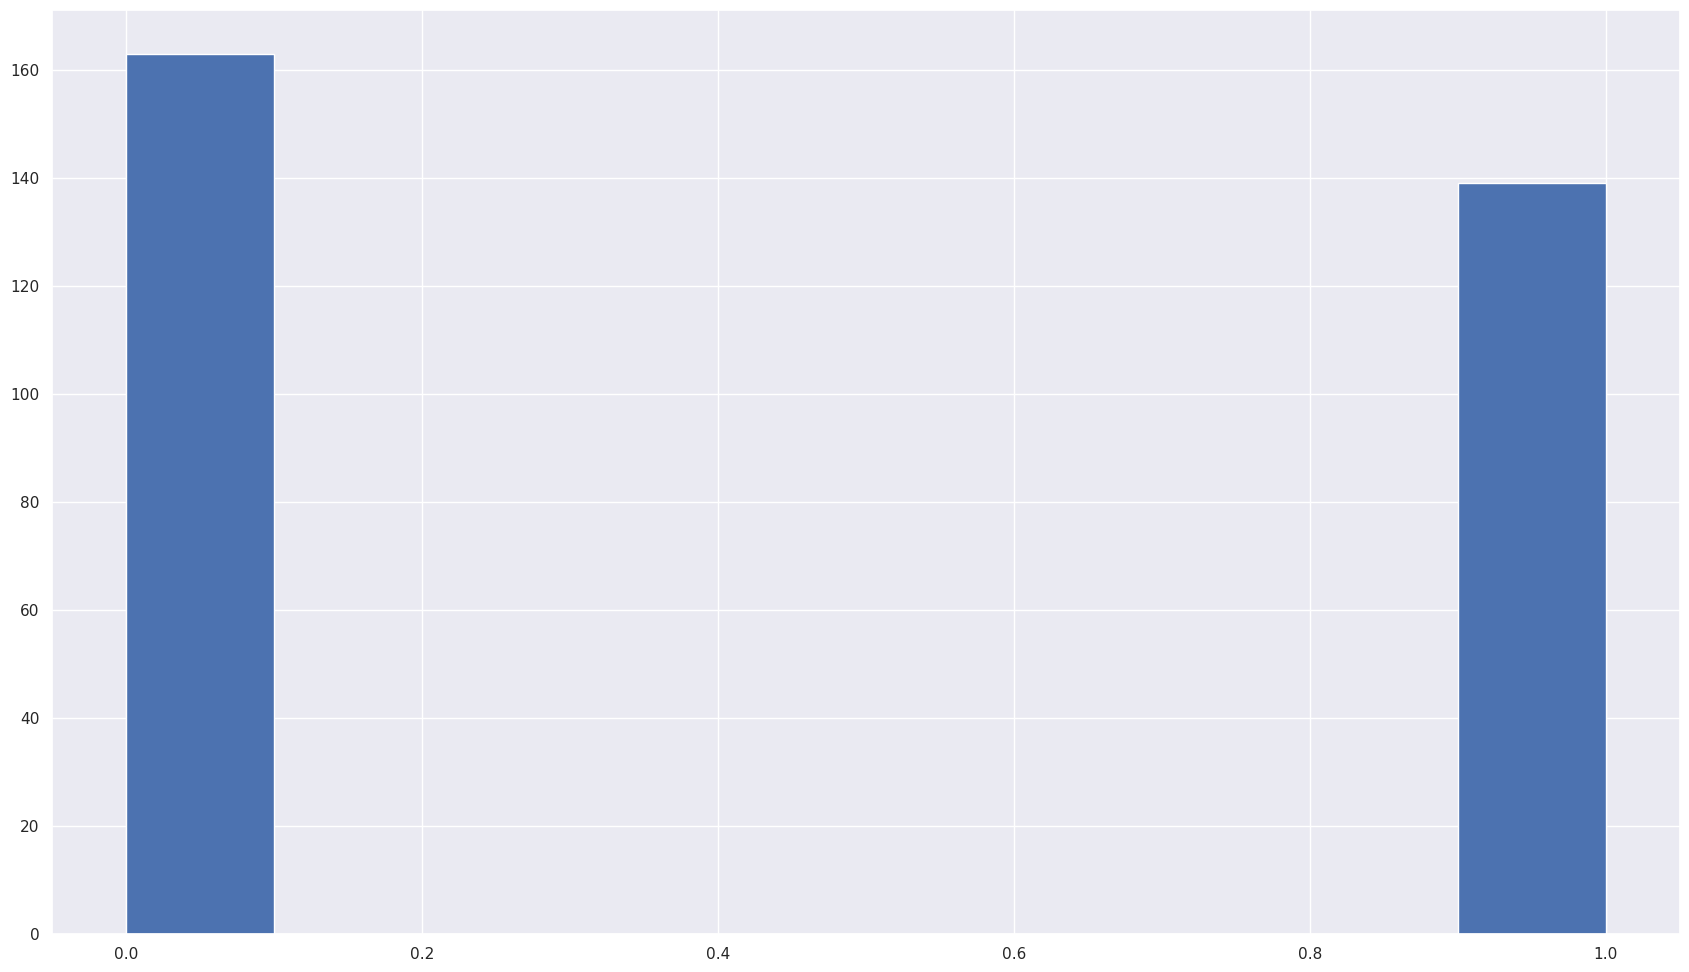

In [21]:
dataset['target'] = dataset.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
dataset['target'].hist()

---
Corelațiile descriu relații între perechi variabile indicând conform valorilor acestora:
* dacă o variabilă crește, cealaltă crește și ea (valoare de corelație pozitivă, spre 1)
* dacă o variabilă crește, cealaltă scade (valoare de corelație negativă, spre -1)
* cele două variabile nu sunt suficient (sau deloc) corelate (valoare de corelație apropiată de 0)

Calculăm folosind metode din _pandas_ valorile acestor corelații (Pearson). Valorile le vom afișa apoi utilizând o hartă cu temperatură (heatmap) din biblioteca _seaborn_.
 

<Axes: >

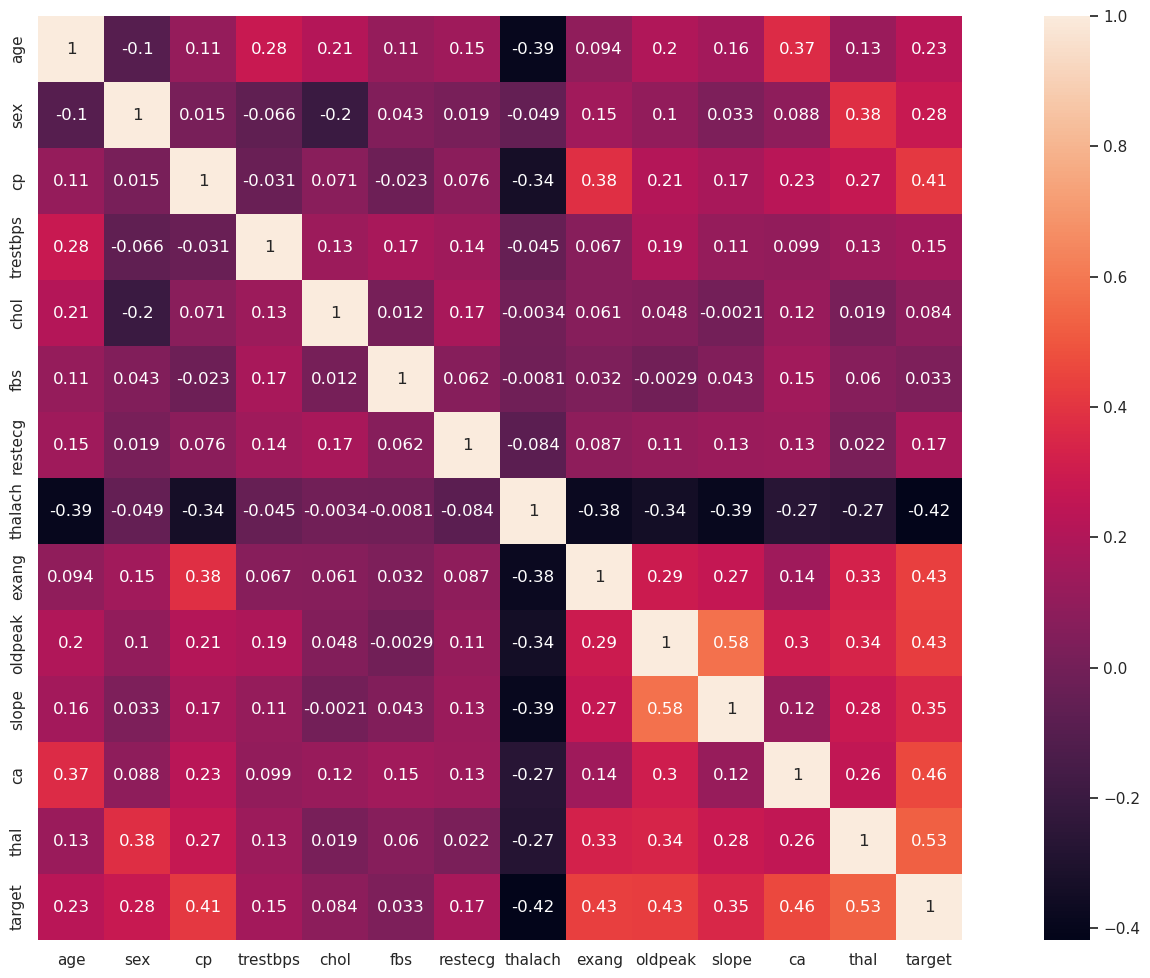

In [22]:
corr = dataset.corr()
sns.heatmap(corr, cbar=True, annot=True, square=True)

---
Extragem și afișăm top-3 atribute puternic corelate cu ținta. Apoi, extragem și afișăm top-3 atribute cele mai puțin corelate cu ținta. Acestea din urmă reprezintă, spre exemplu, candidați buni de atribute ce ar putea fi eliminate dacă am dori un set de date mai „suplu”.

(HINT: Vom utiliza valoarea absolută a corelației întrucât și corelațiile negative de valori mari absolute sunt considerate „puternice”).

In [23]:
# Sortăm valorile corelațiilor cu ținta și le ordonăm descrescător
target_corr = corr[['target']].abs().sort_values(by='target',ascending=False)
target_corr

,target
target,1.000000
thal,0.525184
ca,0.458893
exang,0.430721
oldpeak,0.429268
thalach,0.417701
cp,0.411625
slope,0.349642
sex,0.279518
age,0.226668


In [24]:
# Extragem top 3 variabile PUTERNIC corelate cu ținta
top_corr = target_corr[1:4]
top_corr

,target
thal,0.525184
ca,0.458893
exang,0.430721


In [25]:
# Extragere top 3 variabile SLAB corelate cu ținta
bottom_corr = target_corr[-3:]
bottom_corr

,target
trestbps,0.153496
chol,0.084485
fbs,0.032923


---
Folosind _seaborn_ vom plot un grafic compus care să descrie modul în care fiecare dintre perechile de atribute din setul de date variază una față de cealaltă. Practic, pentru fiecare astfel de pereche pe o axă vom regăsi valorile primului atribut iar pe celalaltă valorile celui de-al doilea.

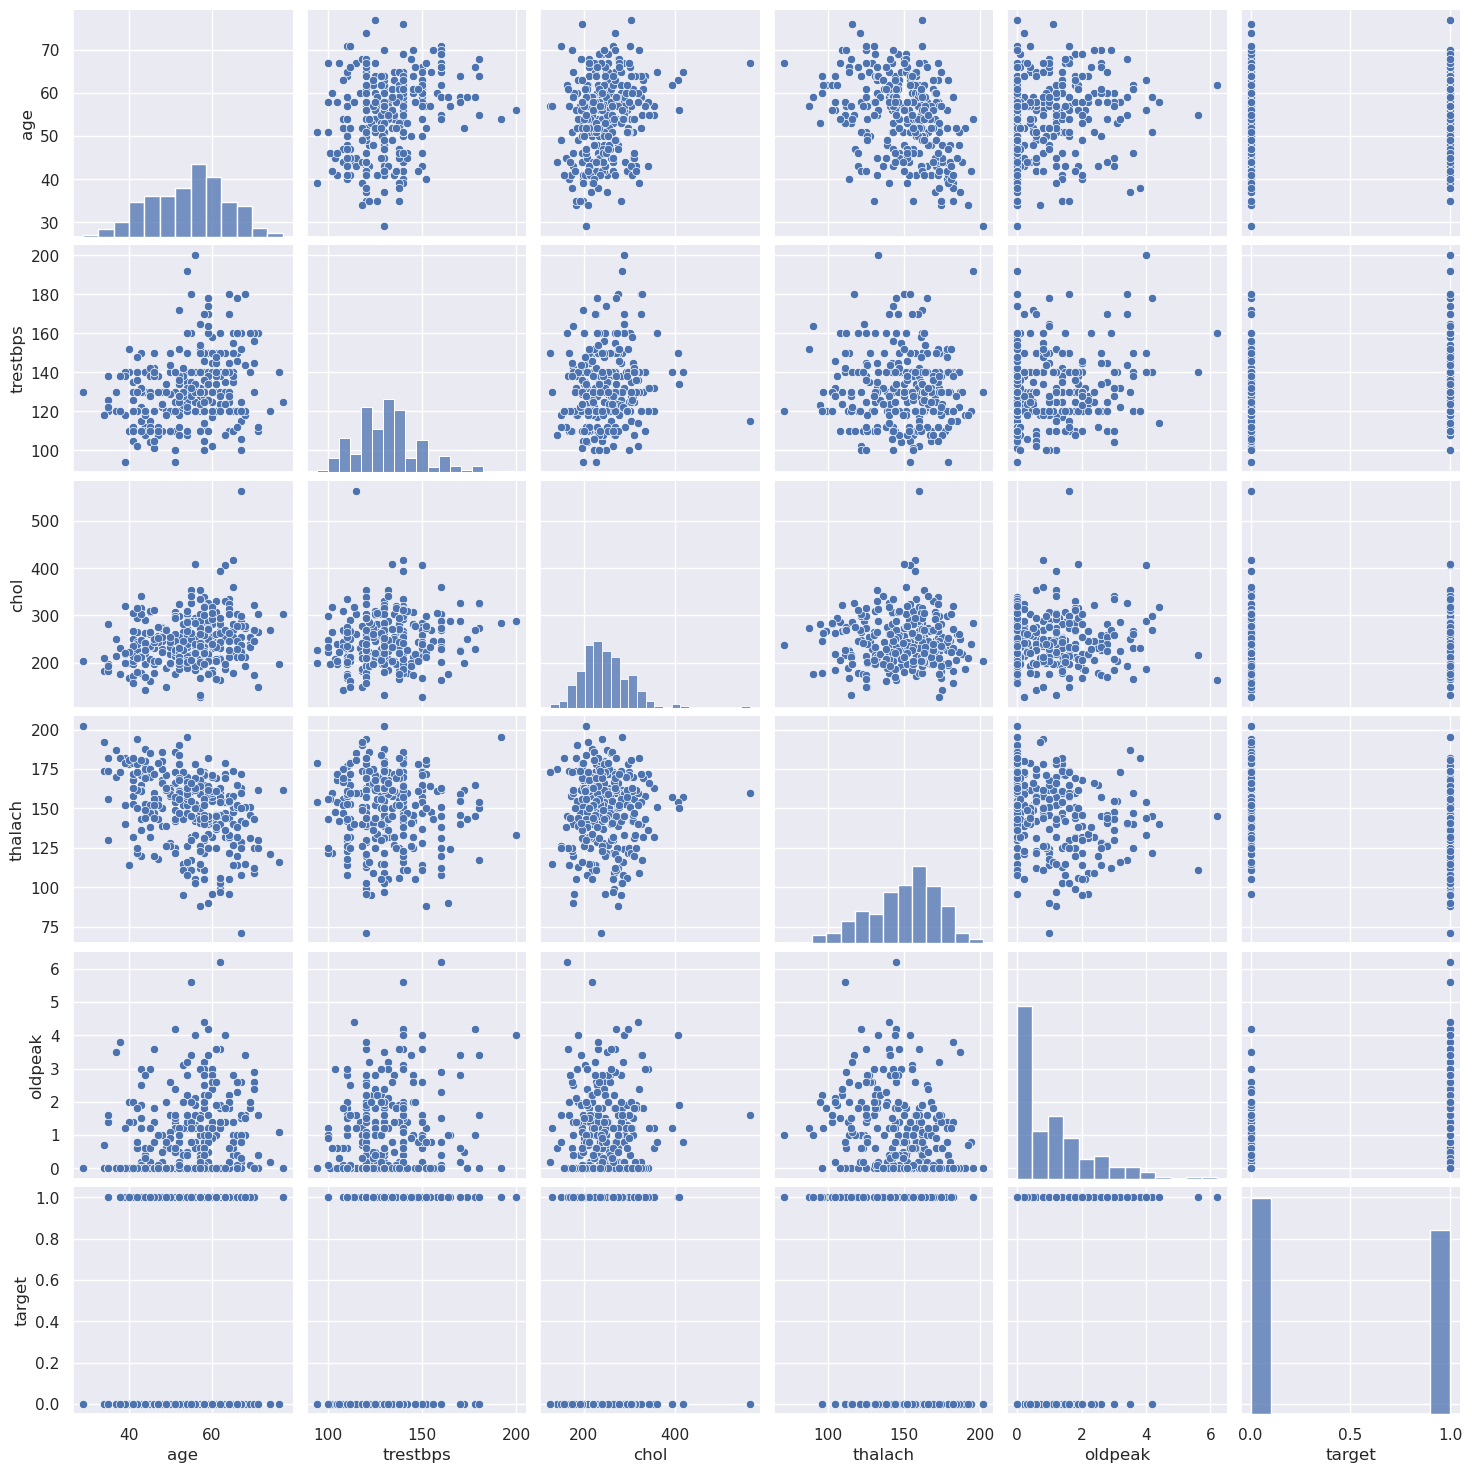

In [26]:
sns.pairplot(dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']])

---
**Boxplot** este un tip de grafic care ne permite să vizualizăm rapid care este valoarile pentru medie, minim, maxim, percentilele 25% și 75% precum și valorile _outlier_ (cu o deviație de la medie mai mare de 3 deviații standard).

Vom realiza un boxplot pentru coloanele _trestbps, chol și thalach_.

<Axes: >

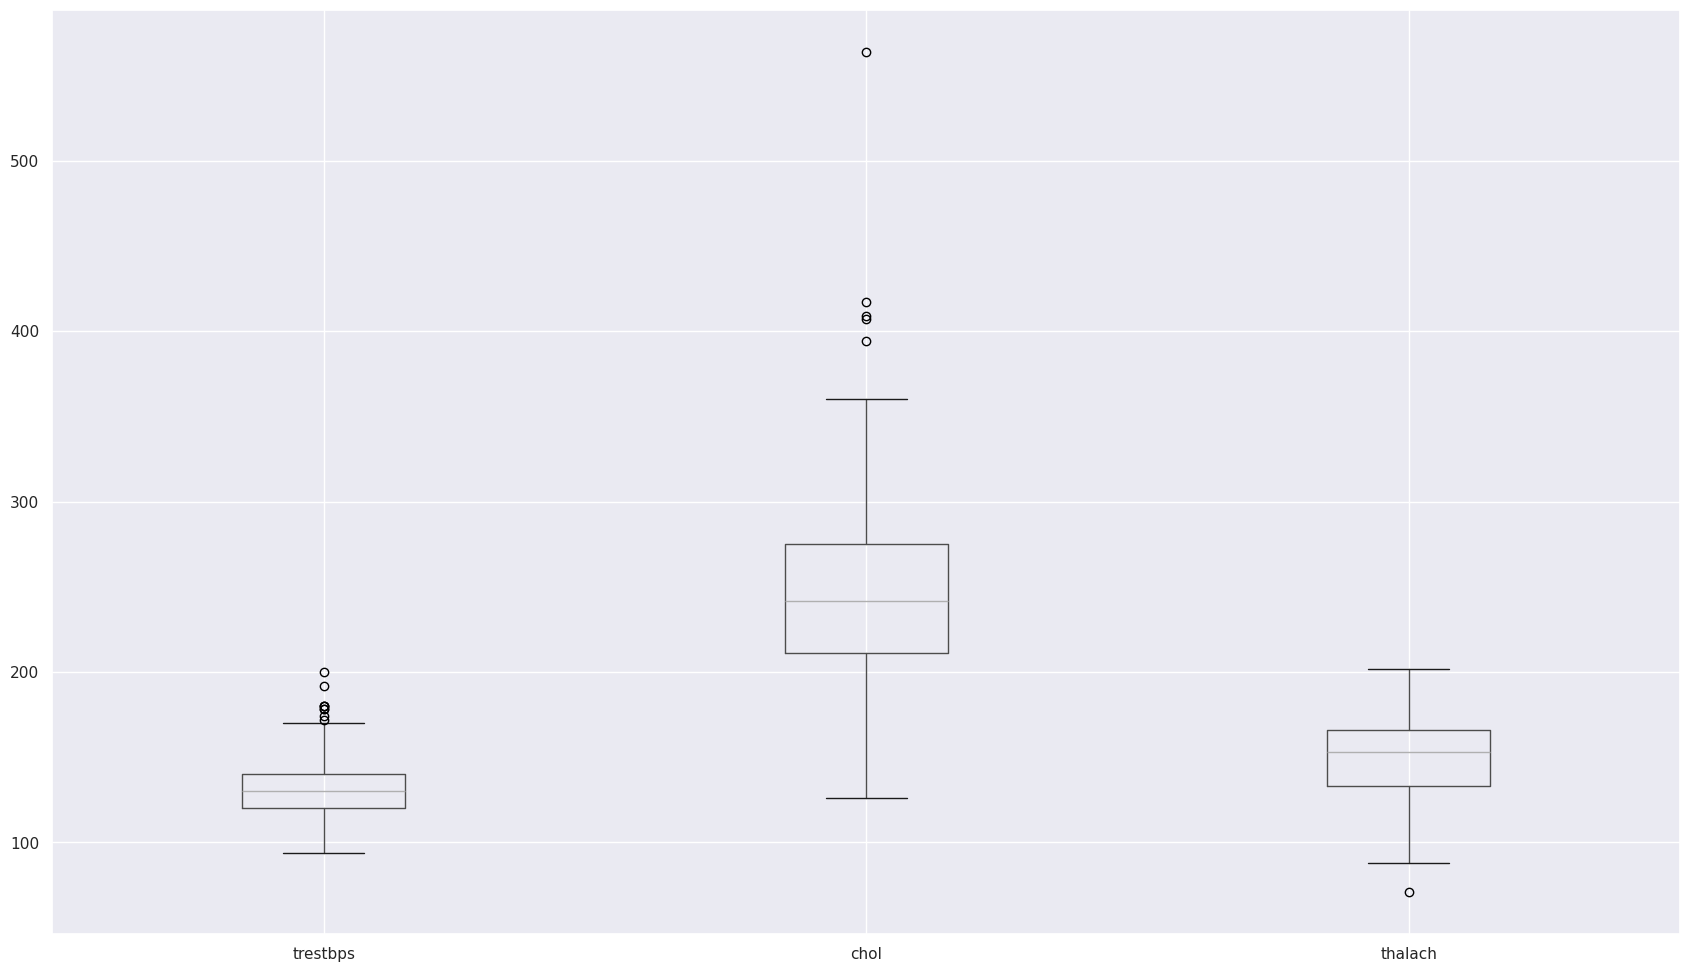

In [27]:
dataset.boxplot(column=['trestbps', 'chol', 'thalach'])